# Fshion_MNIST - Convolutional Neural Network ver.2
-Conv2D 2개  
-MaxPooling2D 1개


In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터전처리

In [4]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_class_train), (X_test, Y_class_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape, X_test.shape
#((60000, 28, 28), (10000, 28, 28)) 2차원... 이걸1차원으로 펼쳐야 한다!!

((60000, 28, 28), (10000, 28, 28))

In [6]:
#CNN만의 특별한 과정 추가!
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train.shape, X_test.shape
#((60000, 28, 28, 1), (10000, 28, 28, 1))

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [7]:
#0~1사이의 값으로 정규화!! CNN 변형!! 
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape

(60000, 28, 28, 1)

In [9]:
#원핫인코딩
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_class_train, 10)
Y_test = to_categorical(Y_class_test, 10)
Y_train[0]
#원핫인코딩의결과array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

### CNN모델 정의, 설정, 학습

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
MODEL_DIR = './model/' 
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [11]:
# 컨볼루션 신경망 설정
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D(pool_size=2), #압축
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4719104   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 4,743,050
Trainable params: 4,743,050
Non-trainable params: 0
______________________________________________

In [12]:
# 모델 실행 환경 설정 
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
# 모델 저장 조건 설정
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [14]:
#모델 최적화 설정
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', 
                               verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [15]:
# 모델 실행
history = model.fit(X_train, Y_train, validation_split=0.2, 
                    epochs=300, batch_size=200, verbose=0,  #위에 checkpointer가 verbose=1이니까
                    callbacks=[early_stopping, checkpointer])


Epoch 00001: val_loss improved from inf to 0.31617, saving model to ./model/best001-0.3162.hdf5

Epoch 00002: val_loss improved from 0.31617 to 0.26298, saving model to ./model/best002-0.2630.hdf5

Epoch 00003: val_loss improved from 0.26298 to 0.24190, saving model to ./model/best003-0.2419.hdf5

Epoch 00004: val_loss improved from 0.24190 to 0.22294, saving model to ./model/best004-0.2229.hdf5

Epoch 00005: val_loss did not improve from 0.22294

Epoch 00006: val_loss did not improve from 0.22294

Epoch 00007: val_loss did not improve from 0.22294

Epoch 00008: val_loss did not improve from 0.22294

Epoch 00009: val_loss did not improve from 0.22294

Epoch 00010: val_loss did not improve from 0.22294

Epoch 00011: val_loss did not improve from 0.22294

Epoch 00012: val_loss did not improve from 0.22294

Epoch 00013: val_loss did not improve from 0.22294

Epoch 00014: val_loss did not improve from 0.22294


In [16]:
from tensorflow.keras.models import load_model
model = load_model('./model/best004-0.2229.hdf5')

In [17]:
# 테스트 정확도 출력 
acc = model.evaluate(X_test, Y_test, verbose=2)[1]
print(f"Test Accuracy: {acc:.4f}")
#fashionMNIST DNN  0.8906
#fashionMNIST CNN1 0.9105
#fashionMNIST CNN2 0.9134

313/313 - 1s - loss: 0.2367 - accuracy: 0.9134
Test Accuracy: 0.9134


### 훈련과정 시각화

In [18]:
# 검증셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

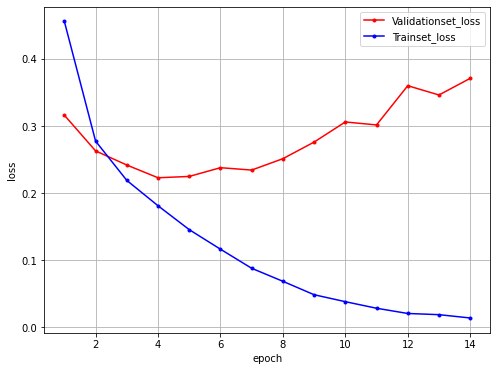

In [20]:
# 그래프로 표현
import matplotlib.pyplot as plt
%matplotlib inline
x_len = np.arange(1, len(y_loss)+1)
plt.figure(figsize=(8,6))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Validationset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
#plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()